In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_train = np.genfromtxt('drive/MyDrive/data/x_train.csv',delimiter=',',usecols=range(1,271),skip_header=1)

In [ ]:
x_test= np.genfromtxt('drive/MyDrive/data/x_test.csv',delimiter=',',usecols=range(1,271),skip_header=1)

In [ ]:
y_train=np.genfromtxt('drive/MyDrive/data/y_train.csv',delimiter=',',usecols=[1],skip_header=1)

In [ ]:
y_test=np.genfromtxt('drive/MyDrive/data/y_test.csv',delimiter=',',usecols=[1],skip_header=1)

In [ ]:
x_unseen = np.genfromtxt('drive/MyDrive/data/x_unseen.csv',delimiter=',',usecols=range(1,271),skip_header=1)

In [ ]:
y_unseen=np.genfromtxt('drive/MyDrive/data/y_unseen.csv',delimiter=',',usecols=[1],skip_header=1)

In [ ]:
y=y_train
y_train=[]
for i in range(len(y)):
    y_train.append(np.array([int(y[i])]))
y_train=np.array(y_train)

In [ ]:
y=y_test
y_test=[]
for i in range(len(y)):
    y_test.append(np.array([int(y[i])]))
y_test=np.array(y_test)

In [ ]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      
      tf.keras.layers.Dense(128, activation=tf.nn.relu,input_shape=(270,)),
      tf.keras.layers.Dense(64, activation=tf.nn.relu),
      tf.keras.layers.Dense(32, activation=tf.nn.relu),
      tf.keras.layers.Dense(16, activation=tf.nn.relu),
      tf.keras.layers.Dense(1)
      
  ])
  return fc_model

model = build_fc_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               34688     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 45,569
Trainable params: 45,569
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='mse',
              metrics=['accuracy'])
# optimizer= tf.keras.optimizers.SGD with SGD standing for **stochastic gradient descent 
# learning rate is the amount of change the model undergoes during the training process
# 'sparse_categorical_crossentropy' loss the crossentropy loss between the labels and predictions.

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
4373/4373 [==============================] - 9s 2ms/step - loss: 0.0465 - accuracy: 0.9403
Epoch 2/5
4373/4373 [==============================] - 8s 2ms/step - loss: 0.0303 - accuracy: 0.9584
Epoch 3/5
4373/4373 [==============================] - 8s 2ms/step - loss: 0.0279 - accuracy: 0.9628
Epoch 4/5
4373/4373 [==============================] - 8s 2ms/step - loss: 0.0252 - accuracy: 0.9657
Epoch 5/5
4373/4373 [==============================] - 8s 2ms/step - loss: 0.0243 - accuracy: 0.9668


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test) 

print('Test accuracy:', test_acc)

3748/3748 [==============================] - 5s 1ms/step - loss: 0.0236 - accuracy: 0.9680
Test accuracy: 0.9679971933364868


In [ ]:
x_train=x_train.reshape(279829, 270, 1)
x_test=x_test.reshape(119927,270,1)

In [ ]:
def build_conv_model():
  conv_model = tf.keras.Sequential([
      
      tf.keras.layers.Conv1D(filters=32,kernel_size=3, activation=tf.nn.relu,input_shape=(270,1)),
      tf.keras.layers.Conv1D(filters=16,kernel_size=3, activation=tf.nn.relu),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation=tf.nn.relu),
      tf.keras.layers.Dense(32, activation=tf.nn.relu),
      tf.keras.layers.Dense(1)
      
  ])
  return conv_model

model_conv = build_conv_model()
model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 268, 32)           128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 266, 16)           1552      
_________________________________________________________________
dropout (Dropout)            (None, 266, 16)           0         
_________________________________________________________________
flatten (Flatten)            (None, 4256)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                272448    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [ ]:
model_conv.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='mse',
              metrics=['accuracy'])
# optimizer= tf.keras.optimizers.SGD with SGD standing for **stochastic gradient descent 
# learning rate is the amount of change the model undergoes during the training process
# 'sparse_categorical_crossentropy' loss the crossentropy loss between the labels and predictions.

In [ ]:
BATCH_SIZE = 64
EPOCHS = 5
model_conv.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
4373/4373 [==============================] - 132s 30ms/step - loss: 0.0441 - accuracy: 0.9422
Epoch 2/5
4373/4373 [==============================] - 129s 30ms/step - loss: 0.0293 - accuracy: 0.9603
Epoch 3/5
4373/4373 [==============================] - 131s 30ms/step - loss: 0.0256 - accuracy: 0.9655
Epoch 4/5
4373/4373 [==============================] - 134s 31ms/step - loss: 0.0230 - accuracy: 0.9690
Epoch 5/5
4373/4373 [==============================] - 139s 32ms/step - loss: 0.0213 - accuracy: 0.9716


In [ ]:
test_loss, test_acc = model_conv.evaluate(x_test, y_test) 

print('Test accuracy:', test_acc)

  61/3748 [..............................] - ETA: 19s - loss: 0.0164 - accuracy: 0.9800

KeyboardInterrupt: ignored

In [ ]:
y=y_unseen
y_unseen=[]
for i in range(len(y)):
    y_unseen.append(np.array([int(y[i])]))
y_unseen=np.array(y_unseen)

In [ ]:
x_unseen=x_unseen.reshape(len(x_unseen), 270, 1)

In [ ]:
unseen_loss, unseen_acc=model_conv.evaluate(x_unseen,y_unseen)
print('unseen accuracy:', unseen_acc)

465/465 [==============================] - 2s 5ms/step - loss: 0.0685 - accuracy: 0.8891
unseen accuracy: 0.8890905380249023


In [ ]:
predictions = model_conv.predict(x_test)

In [ ]:
y_predict=[]
for i in range(len(predictions)) :
  if abs(predictions[i]-1)<abs(predictions[i]):
    predictions[i]=1
  else: 
    predictions[i]=0


In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix \n", confusion_matrix(y_test, predictions))

Confusion matrix 
 [[58014  1674]
 [  969 59270]]


In [ ]:
mod = model_conv

# fit
mod.fit(x_train, y_train)

# f1 score
score = f1_score(predictions, y_test)

# print
print ("Decision Tree F1 score:"+str(score))

8745/8745 [==============================] - 103s 12ms/step - loss: 0.0198 - accuracy: 0.9741
Decision Tree F1 score:0.9781900101499386


In [ ]:
history = model_conv.fit(x_train, y_train, epochs=5, batch_size=64)

print(history.history.keys())
    # summarize history for accuracy


Epoch 1/5
4373/4373 [==============================] - 81s 19ms/step - loss: 0.0174 - accuracy: 0.9774
Epoch 2/5
4373/4373 [==============================] - 81s 19ms/step - loss: 0.0167 - accuracy: 0.9781
Epoch 3/5
4373/4373 [==============================] - 81s 19ms/step - loss: 0.0161 - accuracy: 0.9790
Epoch 4/5
4373/4373 [==============================] - 81s 19ms/step - loss: 0.0157 - accuracy: 0.9799
Epoch 5/5
4373/4373 [==============================] - 81s 18ms/step - loss: 0.0152 - accuracy: 0.9805
dict_keys(['loss', 'accuracy'])


NameError: ignored

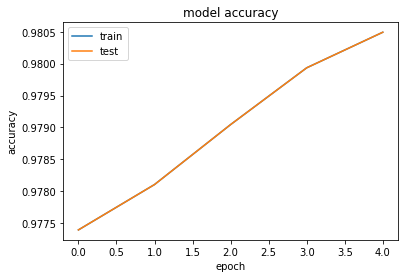

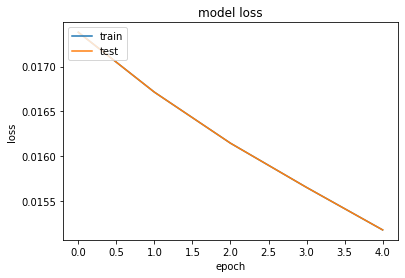

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])  # RAISE ERROR
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
    # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['loss']) #RAISE ERROR
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix \n", confusion_matrix(actuals, predictions))


In [ ]:
for i in len(predictions):
  

119927

In [ ]:
cm=confusion_matrix(y_test,predictions)

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
model_conv = Sequential()
model_conv.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(270,1)))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model = keras.Sequential(
    [
        #layers.Input(shape=(270, 1)),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu",input_shape=(270,1)
        ),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation=tf.nn.relu),
        tf.keras.layers.Dense(16, activation=tf.nn.relu),
        tf.keras.layers.Dense(1)
        
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 135, 32)           256       
_________________________________________________________________
flatten (Flatten)            (None, 4320)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                138272    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 139,073
Trainable params: 139,073
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.Sequential(
    [
        layers.Input(shape=(270, 1)),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

AttributeError: module 'tensorflow.keras.layers' has no attribute 'Conv1DTranspose'

In [ ]:
x_train=x_train.reshape(279829, 270)

In [ ]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [128,1] and labels shape [34560]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-33-6bf0b310427c>:1) ]] [Op:__inference_train_function_222241]

Function call stack:
train_function


/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-package

/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-package

/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/mahdi/anaconda3/envs/tf-gpu/lib/python3.8/site-package

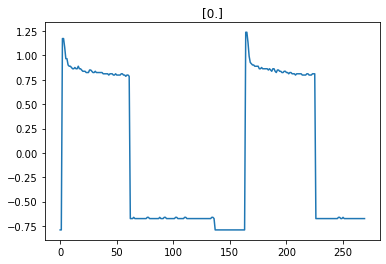

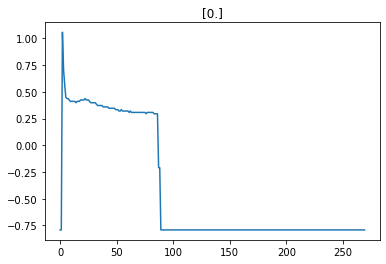

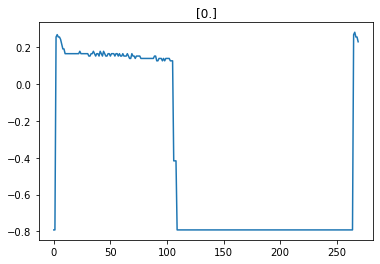

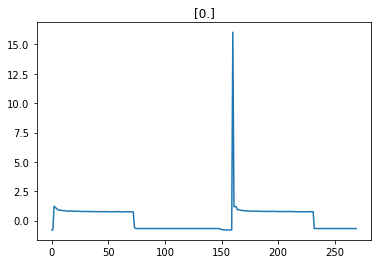

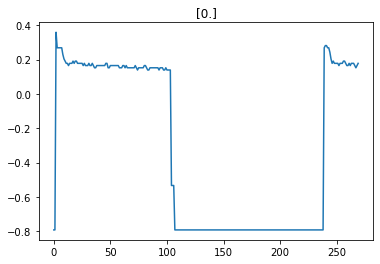

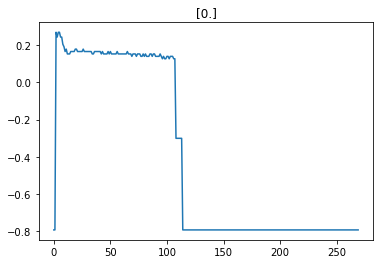

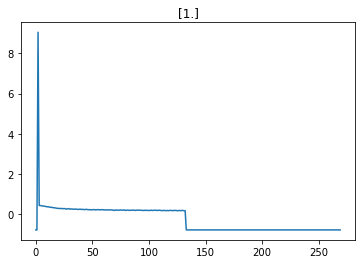

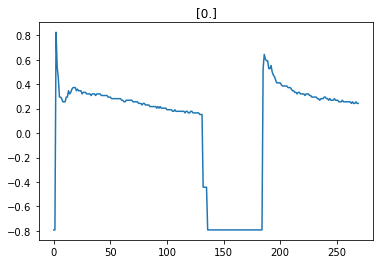

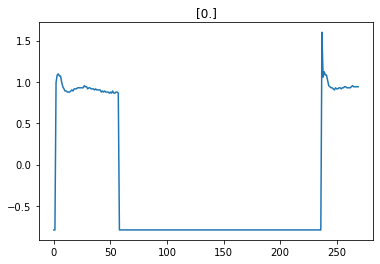

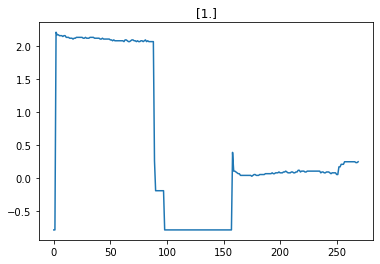

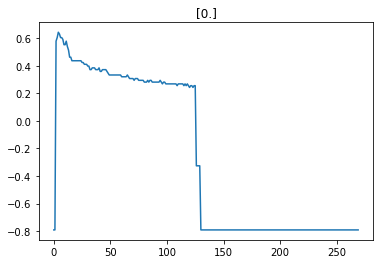

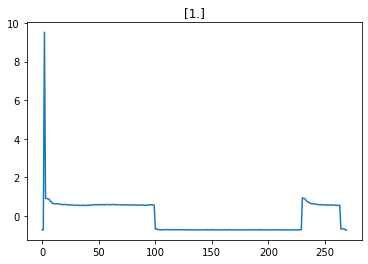

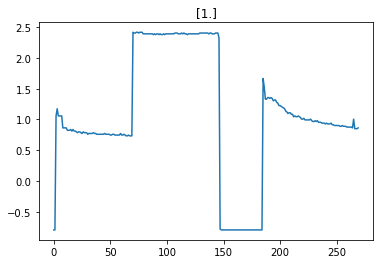

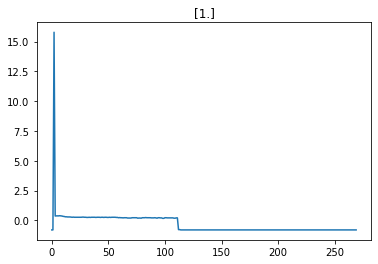

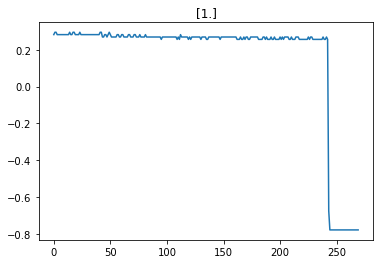

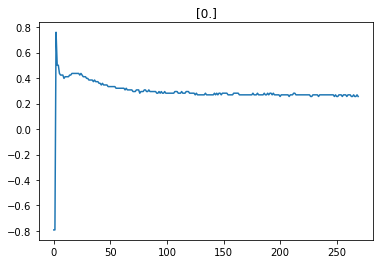

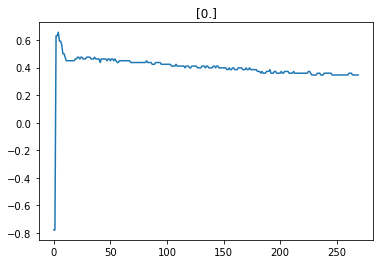

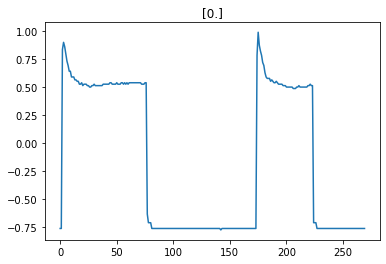

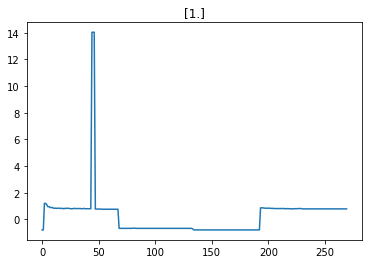

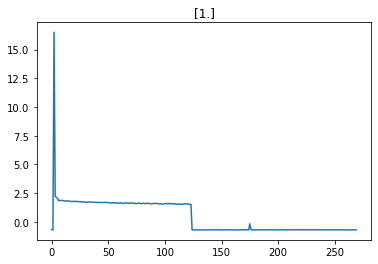

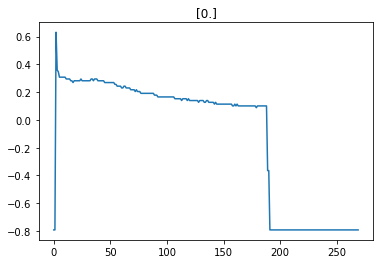

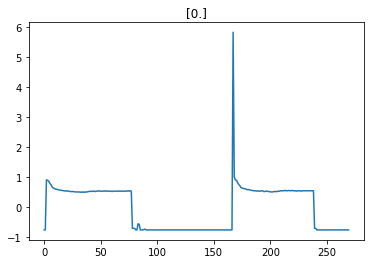

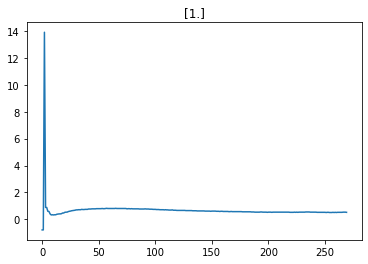

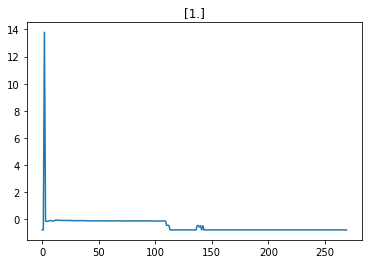

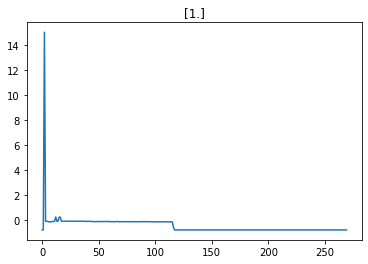

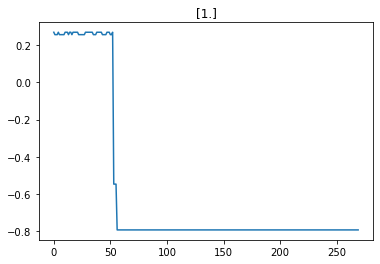

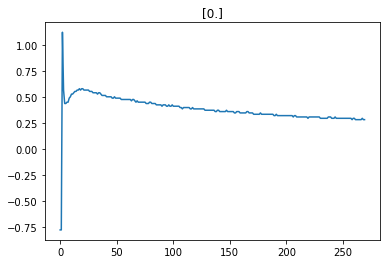

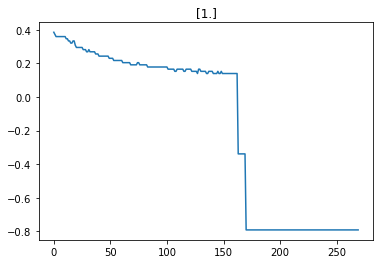

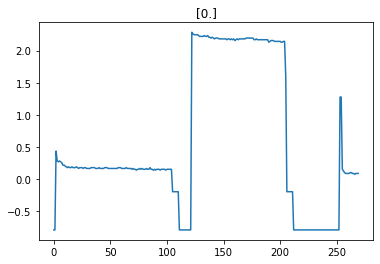

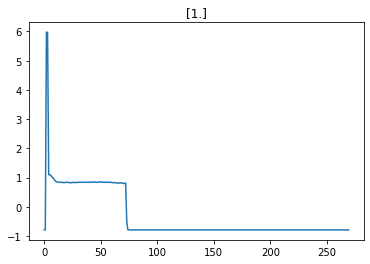

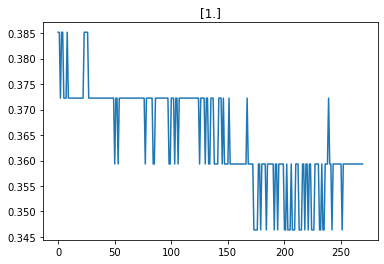

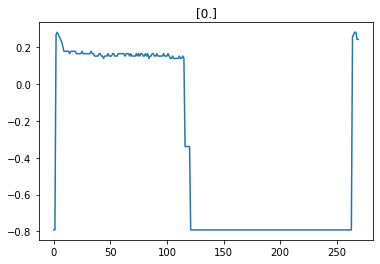

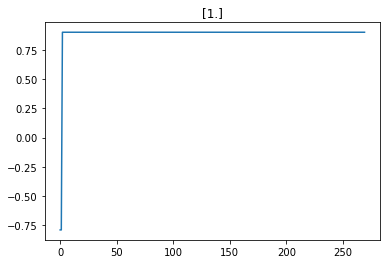

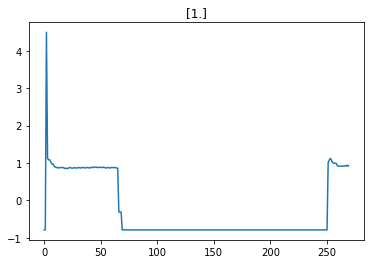

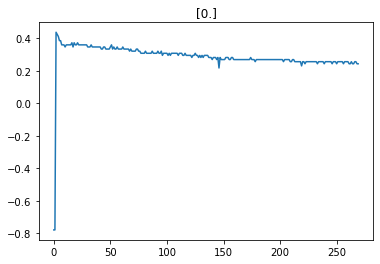

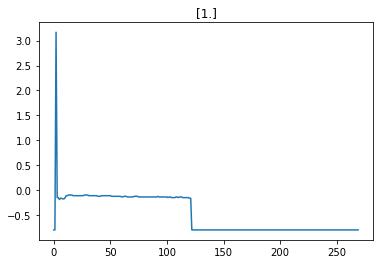

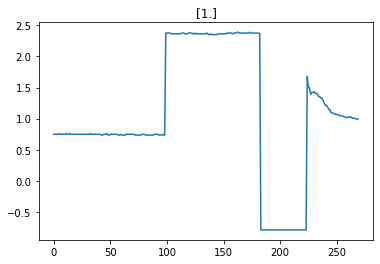

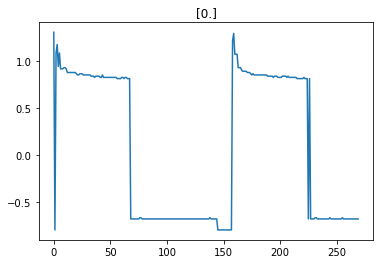

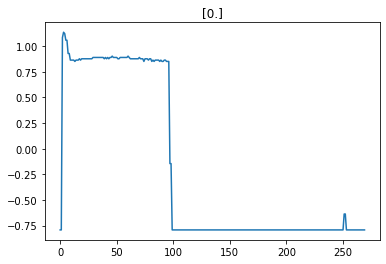

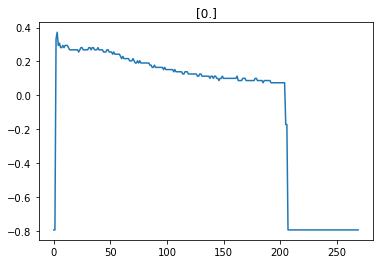

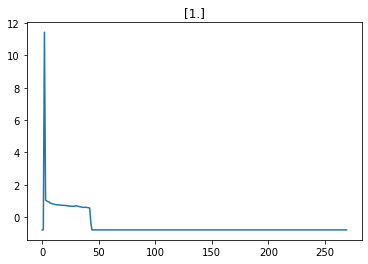

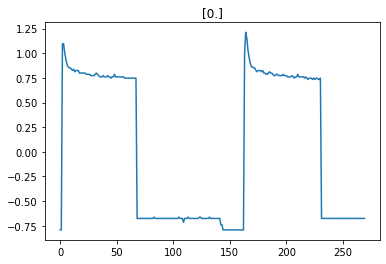

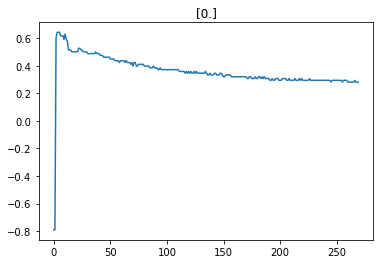

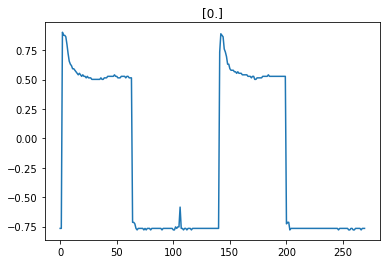

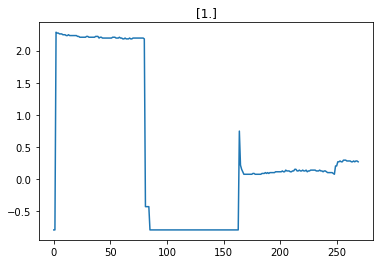

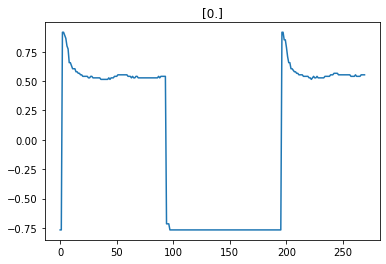

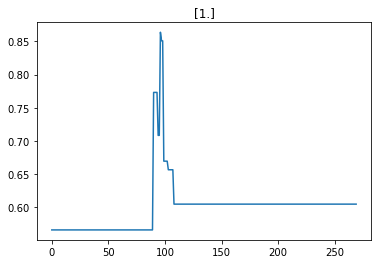

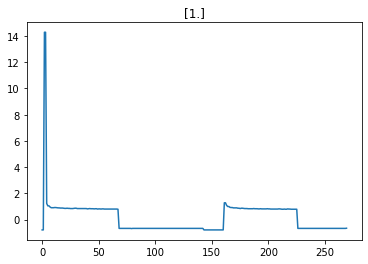

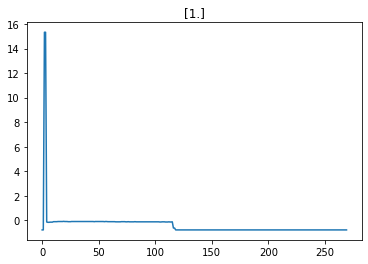

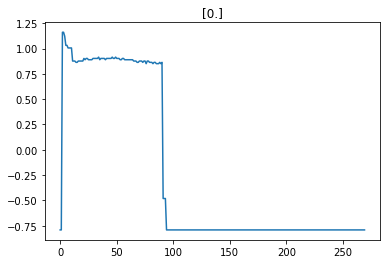

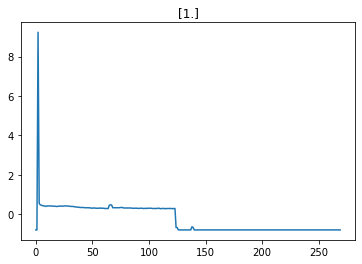

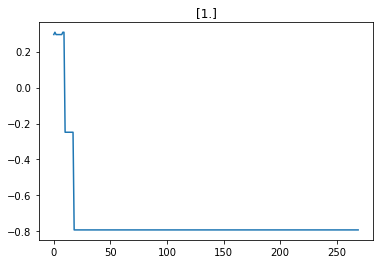

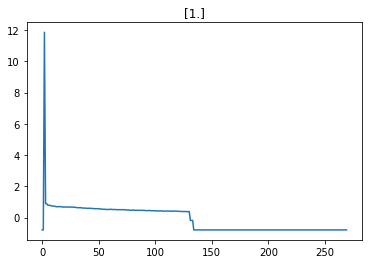

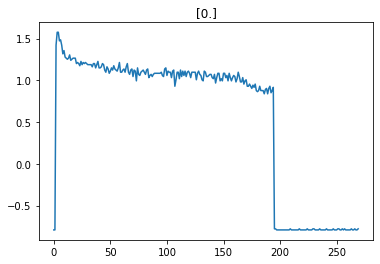

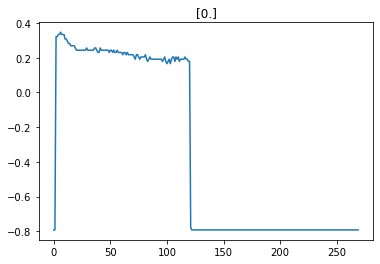

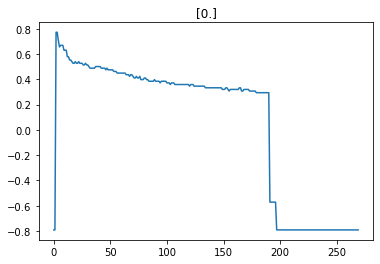

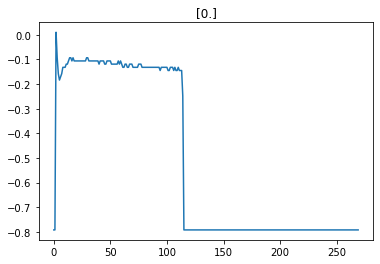

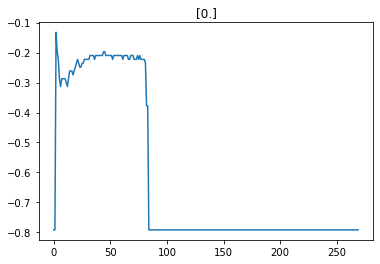

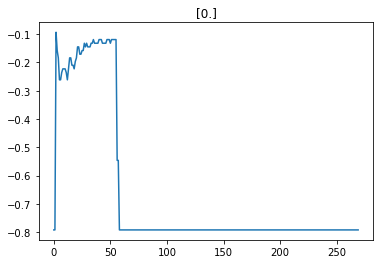

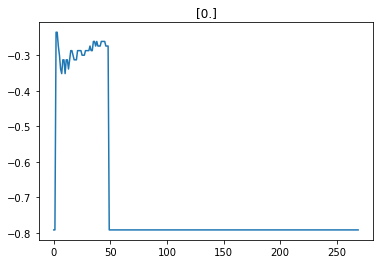

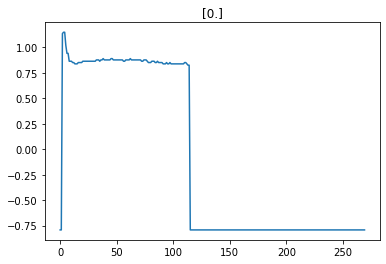

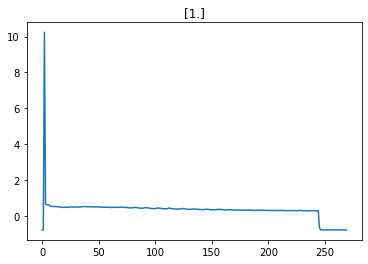

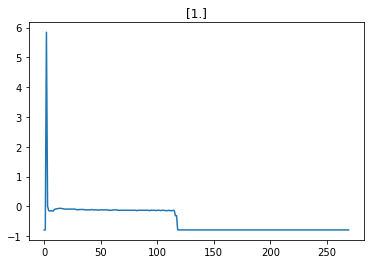

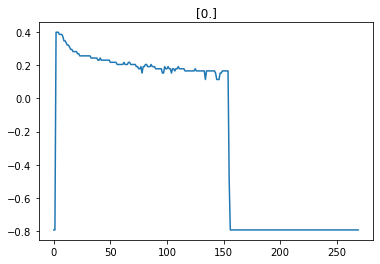

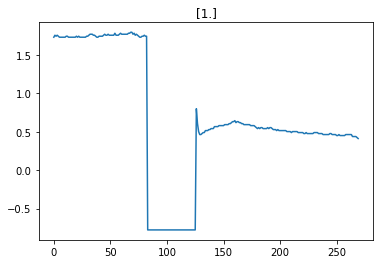

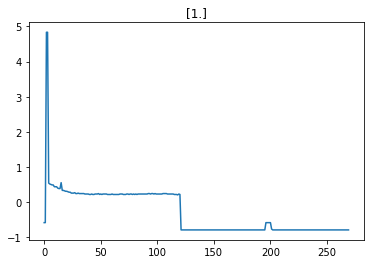

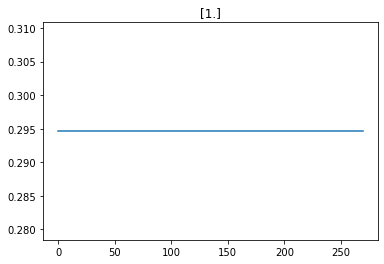

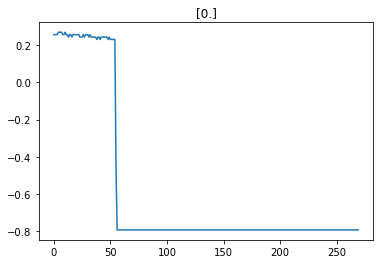

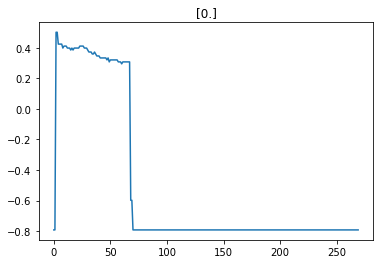

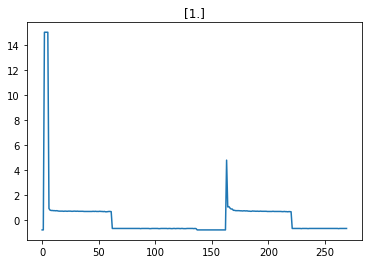

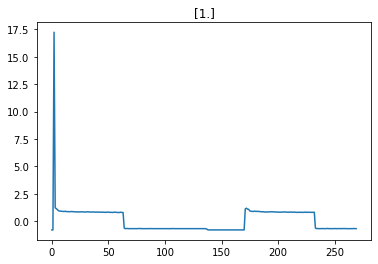

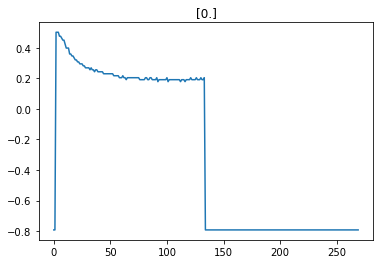

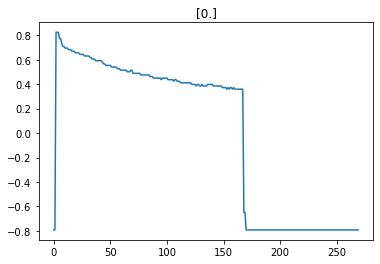

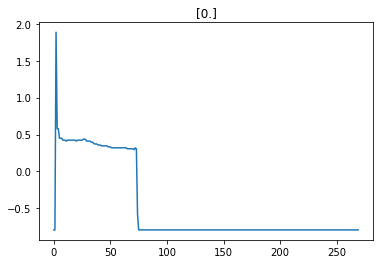

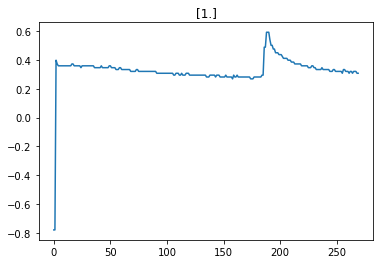

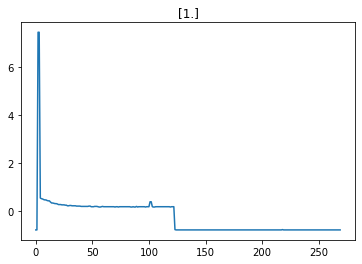

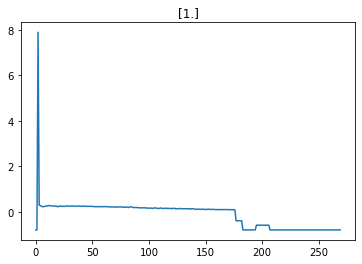

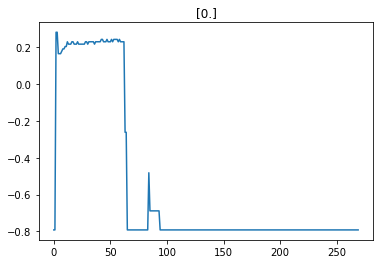

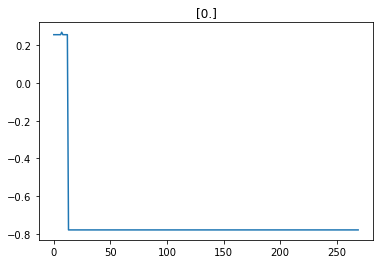

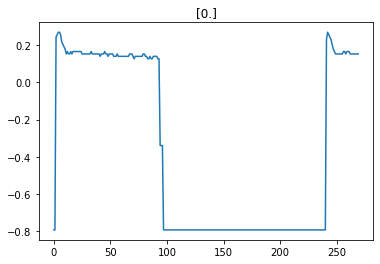

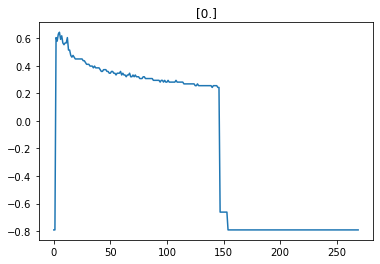

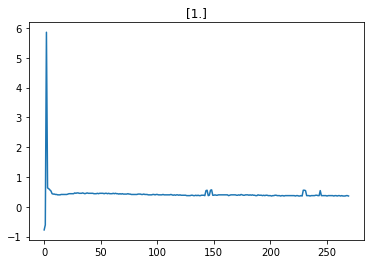

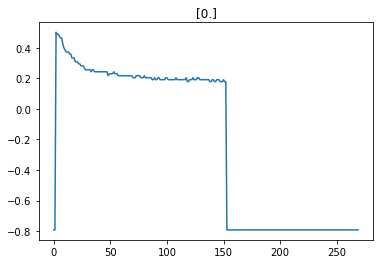

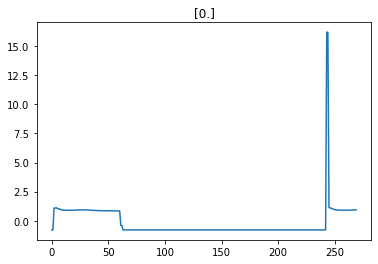

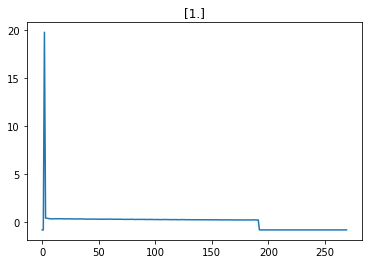

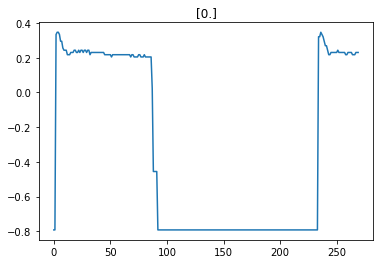

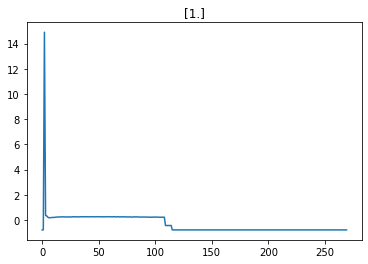

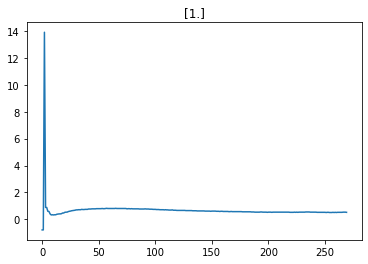

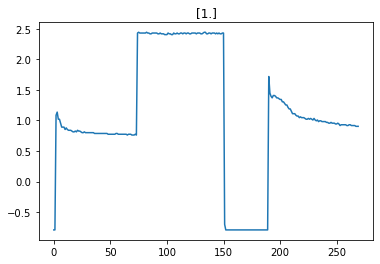

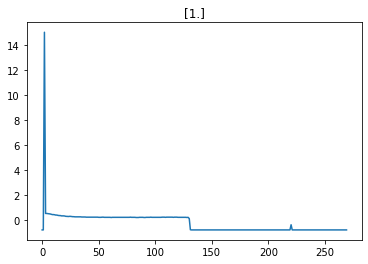

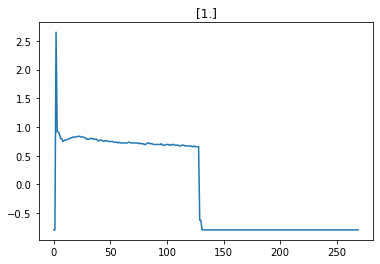

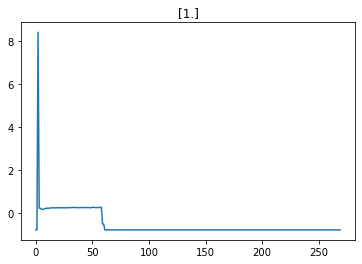

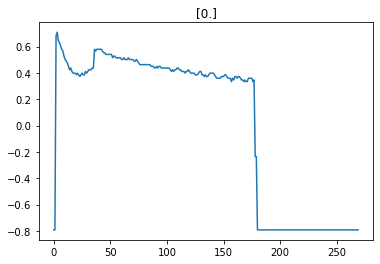

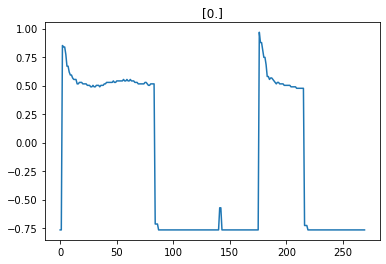

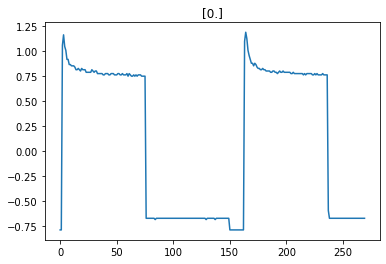

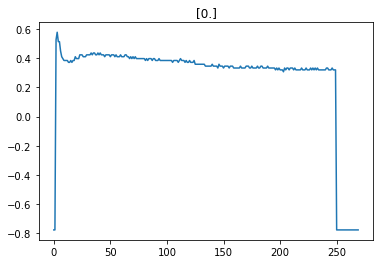

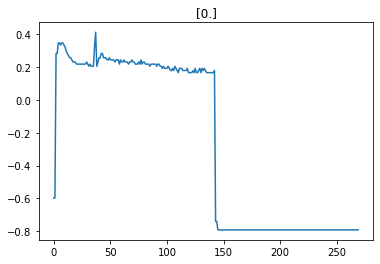

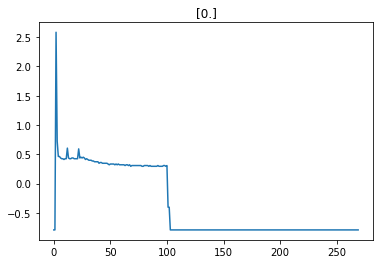

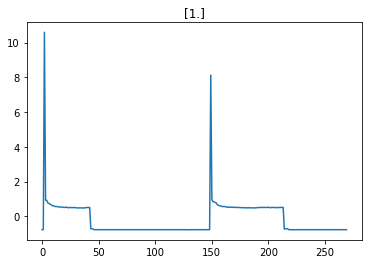

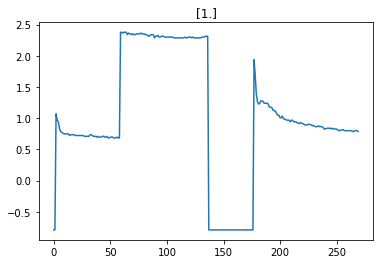

In [ ]:
import random
from matplotlib import pyplot as plt
activation_list=random.sample(range(0, len(y_train)),100)
for i in activation_list:
    plt.figure()
    plt.plot(x_train[i])
    plt.title(y_train[i])